In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
# | default_exp npg.plots


In [ ]:
# | export

import pandas as pd
import pyarrow.dataset as ds
import seaborn as sns
from fastcore.all import *


In [ ]:
# | eval: false
cols = "circuit	description	timestamp	value".split()

keep_descriptions = ["active power (kw)", "reactive power (kvar)"]

scanner_args = dict(
    filter=ds.field("description").isin(keep_descriptions),
    columns=cols,
)
dset = ds.dataset(
    "npg.parquet/",
    partitioning="hive",
)

dset.count_rows(**scanner_args)


129322908

In [ ]:
# | eval: false
df = (
    dset.to_table(**scanner_args)
    .to_pandas(self_destruct=True)
    .set_index(["circuit", "timestamp", "description"], append=False)
)
df


OSError: Couldn't deserialize thrift: TProtocolException: Invalid data
Deserializing page header failed.


In [ ]:
# | eval: false
df.loc[df.index.duplicated()]


value
circuit       timestamp                 description                   
LINTON - TRX1 2022-01-01 00:00:00+00:00 active power (kw)       3600.0
              2022-01-01 00:30:00+00:00 active power (kw)       8100.0
              2022-01-01 01:00:00+00:00 active power (kw)      10800.0
              2022-01-01 01:30:00+00:00 active power (kw)      13500.0
              2022-01-01 02:00:00+00:00 active power (kw)        900.0
...                                                                ...
BARUGH - TRX2 2022-12-31 21:30:00+00:00 reactive power (kvar)   -769.0
              2022-12-31 22:00:00+00:00 reactive power (kvar)   -769.0
              2022-12-31 22:30:00+00:00 reactive power (kvar)   -895.0
              2022-12-31 23:00:00+00:00 reactive power (kvar)   -895.0
              2022-12-31 23:30:00+00:00 reactive power (kvar)   -911.0

[1205943 rows x 1 columns]

In [ ]:
# | eval: false

df.loc[df.value.isna()]


,,,value
circuit,timestamp,description,


In [ ]:
# | eval: false

df = df.loc[~df.index.duplicated()]
df


value
circuit                       timestamp                 description                   
LINTON - BEDLINGTON SW TEED   2022-01-01 00:00:00+00:00 active power (kw)       7000.0
                              2022-01-01 00:30:00+00:00 active power (kw)       4500.0
                              2022-01-01 01:00:00+00:00 active power (kw)       6500.0
                              2022-01-01 01:30:00+00:00 active power (kw)      11000.0
                              2022-01-01 02:00:00+00:00 active power (kw)       5500.0
...                                                                                ...
WAVERLEY BUSINESS PARK - TRX2 2022-12-31 21:30:00+00:00 reactive power (kvar)   -220.0
                              2022-12-31 22:00:00+00:00 reactive power (kvar)   -283.0
                              2022-12-31 22:30:00+00:00 reactive power (kvar)   -314.0
                              2022-12-31 23:00:00+00:00 reactive power (kvar)   -314.0
                              2022-12-31 23:30:00+00:00 reactive power (kvar)   -314.0

[40781170 rows x 1 columns]

In [ ]:
# | eval: false

df = df.unstack([-1, 0]).droplevel(0, axis=1)
df


description                         active power (kw)                          \
circuit                   LINTON - BEDLINGTON SW TEED LINTON - DENWICK 1 TEED   
timestamp                                                                       
2022-01-01 00:00:00+00:00                      7000.0                     0.0   
2022-01-01 00:30:00+00:00                      4500.0                  5250.0   
2022-01-01 00:31:39+00:00                         NaN                     NaN   
2022-01-01 00:31:42+00:00                         NaN                     NaN   
2022-01-01 01:00:00+00:00                      6500.0                  8250.0   
...                                               ...                     ...   
2022-12-31 21:30:00+00:00                      9500.0                   750.0   
2022-12-31 22:00:00+00:00                     12000.0                  1500.0   
2022-12-31 22:30:00+00:00                     12500.0                  -750.0   
2022-12-31 23:00:00+00:00                     11500.0                  -750.0   
2022-12-31 23:30:00+00:00                     13000.0                 -3000.0   

description                                                       \
circuit                   LINTON - DENWICK 2 TEED DENWICK - TRX1   
timestamp                                                          
2022-01-01 00:00:00+00:00                     0.0         5750.0   
2022-01-01 00:30:00+00:00                  5250.0         6500.0   
2022-01-01 00:31:39+00:00                     NaN            NaN   
2022-01-01 00:31:42+00:00                     NaN            NaN   
2022-01-01 01:00:00+00:00                  8250.0         7750.0   
...                                           ...            ...   
2022-12-31 21:30:00+00:00                  1500.0         7250.0   
2022-12-31 22:00:00+00:00                  1500.0         7000.0   
2022-12-31 22:30:00+00:00                  -750.0         6500.0   
2022-12-31 23:00:00+00:00                  -750.0         6000.0   
2022-12-31 23:30:00+00:00                 -3000.0         6000.0   

description                                                           \
circuit                   DENWICK - TRX2 LINTON - TRX1 LINTON - TRX2   
timestamp                                                              
2022-01-01 00:00:00+00:00         5500.0           NaN           NaN   
2022-01-01 00:30:00+00:00         6250.0           NaN           NaN   
2022-01-01 00:31:39+00:00            NaN           NaN           NaN   
2022-01-01 00:31:42+00:00            NaN           NaN           NaN   
2022-01-01 01:00:00+00:00         7500.0           NaN           NaN   
...                                  ...           ...           ...   
2022-12-31 21:30:00+00:00         7000.0           NaN           NaN   
2022-12-31 22:00:00+00:00         6750.0           NaN           NaN   
2022-12-31 22:30:00+00:00         6500.0           NaN           NaN   
2022-12-31 23:00:00+00:00         6000.0           NaN           NaN   
2022-12-31 23:30:00+00:00         5750.0           NaN           NaN   

description                                                       \
circuit                   STOBSWOOD COAL - TRX$ WARKWORTH - TRX1   
timestamp                                                          
2022-01-01 00:00:00+00:00                 112.0           3750.0   
2022-01-01 00:30:00+00:00                 112.0           4000.0   
2022-01-01 00:31:39+00:00                   NaN              NaN   
2022-01-01 00:31:42+00:00                   NaN              NaN   
2022-01-01 01:00:00+00:00                 112.0           4250.0   
...                                         ...              ...   
2022-12-31 21:30:00+00:00                   NaN           5000.0   
2022-12-31 22:00:00+00:00                   NaN           5000.0   
2022-12-31 22:30:00+00:00                   NaN           4750.0   
2022-12-31 23:00:00+00:00                   NaN           4500.0   
2022-12-31 23:30:00

In [ ]:
# | eval: false
df.index.strftime("%Y-%m")


Index(['2022-01', '2022-01', '2022-01', '2022-01', '2022-01', '2022-01',
       '2022-01', '2022-01', '2022-01', '2022-01',
       ...
       '2022-12', '2022-12', '2022-12', '2022-12', '2022-12', '2022-12',
       '2022-12', '2022-12', '2022-12', '2022-12'],
      dtype='object', name='timestamp', length=37536)

<Axes: xlabel='description-circuit', ylabel='timestamp'>

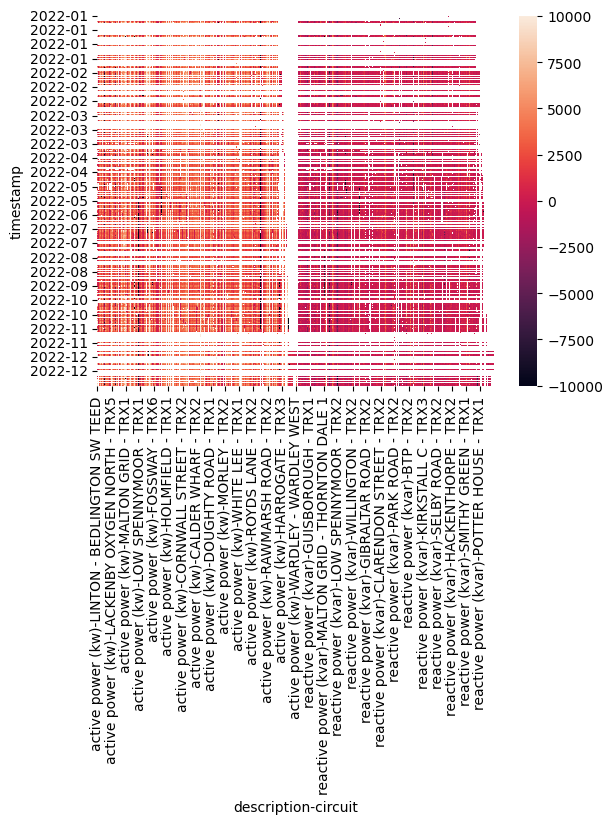

In [ ]:
# | eval: false

d = df.clip(-10000, 10000)
d.index = d.index.strftime("%Y-%m")
sns.heatmap(data=d)
del d


In [ ]:
# | hide
from nbdev.showdoc import *
